In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem import AllChem
import more_itertools as mit

pd.set_option('display.max_colwidth', None)

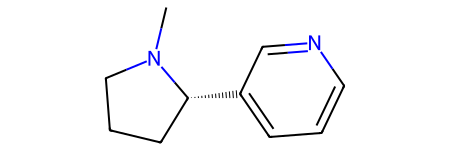

In [2]:
m = Chem.MolFromSmiles('CN1CCC[C@H]1c1cccnc1')
m

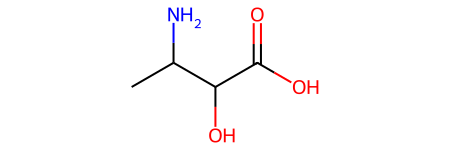

In [3]:
(p1 := Chem.MolFromSmiles('CC(N)C(O)C(O)=O'))

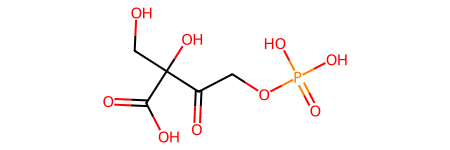

In [4]:
Chem.MolFromSmiles('O=C(O)C(O)(CO)C(=O)COP(=O)(O)O')

In [5]:
from src.smarts import ActivationSmarts, BaseSmarts

In [6]:
print(ActivationSmarts.C4_FG123)

[!$([#6]!@[#6]!@[#6]!@[#6]!@[#6]);#6;$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;!$([#6]~[!#1&!#6]);!$([#6]@[#6])]


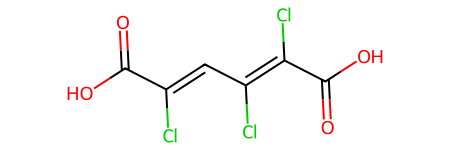

In [7]:
(n1 := Chem.MolFromSmiles('O=C(O)C(Cl)=CC(Cl)=C(Cl)C(=O)O'))

In [8]:
n1.HasSubstructMatch(Chem.MolFromSmarts('[#6;!$([#6]~[!#1,!#6])]'))
# n1.HasSubstructMatch(Chem.MolFromSmarts('[C;X4;!$([C;!#1][!#6]'))


False

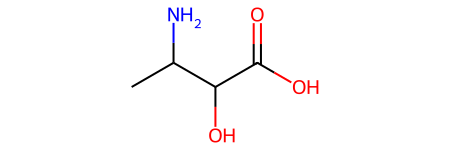

In [9]:
Chem.MolFromSmiles('CC(N)C(O)C(O)=O')

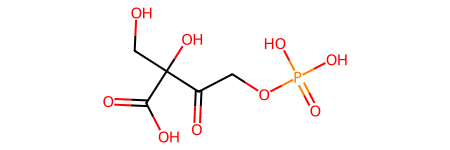

In [10]:
(n2 := Chem.MolFromSmiles('O=C(O)C(O)(CO)C(=O)COP(=O)(O)O'))

In [11]:
n2.HasSubstructMatch(ActivationSmarts.C4_FG123.as_mol())

False

In [12]:
a = list(n2.GetAtoms())

In [13]:
a = list(n2.GetAtoms())[0]

In [14]:
a.GetSmarts()

'O'

In [15]:
[(a.GetSmarts(allHsExplicit=True), [n.GetSmarts(allHsExplicit=True) for n in a.GetNeighbors()]) for a in n2.GetAtoms()]

[('[O]', ['[C]']),
 ('[C]', ['[O]', '[OH]', '[C]']),
 ('[OH]', ['[C]']),
 ('[C]', ['[C]', '[OH]', '[CH2]', '[C]']),
 ('[OH]', ['[C]']),
 ('[CH2]', ['[C]', '[OH]']),
 ('[OH]', ['[CH2]']),
 ('[C]', ['[C]', '[O]', '[CH2]']),
 ('[O]', ['[C]']),
 ('[CH2]', ['[C]', '[O]']),
 ('[O]', ['[CH2]', '[P]']),
 ('[P]', ['[O]', '[O]', '[OH]', '[OH]']),
 ('[O]', ['[P]']),
 ('[OH]', ['[P]']),
 ('[OH]', ['[P]'])]

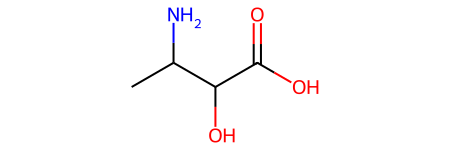

In [16]:
(p2 := Chem.MolFromSmiles('CC(N)C(O)C(O)=O'))

In [17]:
p2.HasSubstructMatch(ActivationSmarts.C4_FG123.as_mol())

True

In [18]:
[
    (a.GetSmarts(allHsExplicit=True), a.GetTotalDegree(), [n.GetSmarts(allHsExplicit=True) for n in a.GetNeighbors()])
    for a in p2.GetAtoms()
]

[('[CH3]', 4, ['[CH]']),
 ('[CH]', 4, ['[CH3]', '[NH2]', '[CH]']),
 ('[NH2]', 3, ['[CH]']),
 ('[CH]', 4, ['[CH]', '[OH]', '[C]']),
 ('[OH]', 2, ['[CH]']),
 ('[C]', 3, ['[CH]', '[OH]', '[O]']),
 ('[OH]', 2, ['[C]']),
 ('[O]', 1, ['[C]'])]

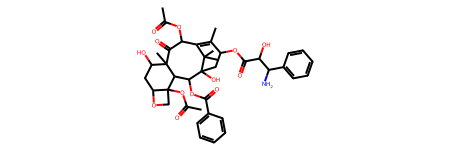

In [19]:
(x := Chem.MolFromSmiles('CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(=O)c2ccccc2)C2(O)CC(OC(=O)C(O)C(N)c3ccccc3)C(C)=C1C2(C)C'))

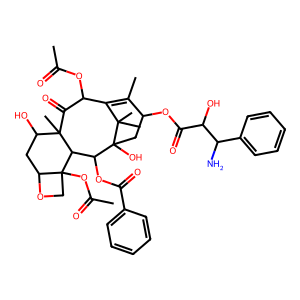

In [20]:
Draw.MolToImage(x)

In [21]:
[
    (a.GetSmarts(allHsExplicit=True), a.GetTotalDegree(), [n.GetSmarts(allHsExplicit=True) for n in a.GetNeighbors()])
    for a in x.GetAtoms()
]

[('[CH3]', 4, ['[C]']),
 ('[C]', 3, ['[CH3]', '[O]', '[O]']),
 ('[O]', 1, ['[C]']),
 ('[O]', 2, ['[C]', '[CH]']),
 ('[CH]', 4, ['[O]', '[C]', '[C]']),
 ('[C]', 3, ['[CH]', '[O]', '[C]']),
 ('[O]', 1, ['[C]']),
 ('[C]', 4, ['[C]', '[CH3]', '[CH]', '[CH]']),
 ('[CH3]', 4, ['[C]']),
 ('[CH]', 4, ['[C]', '[OH]', '[CH2]']),
 ('[OH]', 2, ['[CH]']),
 ('[CH2]', 4, ['[CH]', '[CH]']),
 ('[CH]', 4, ['[CH2]', '[O]', '[C]']),
 ('[O]', 2, ['[CH]', '[CH2]']),
 ('[CH2]', 4, ['[O]', '[C]']),
 ('[C]', 4, ['[CH2]', '[O]', '[CH]', '[CH]']),
 ('[O]', 2, ['[C]', '[C]']),
 ('[C]', 3, ['[O]', '[CH3]', '[O]']),
 ('[CH3]', 4, ['[C]']),
 ('[O]', 1, ['[C]']),
 ('[CH]', 4, ['[C]', '[CH]', '[C]']),
 ('[CH]', 4, ['[CH]', '[O]', '[C]']),
 ('[O]', 2, ['[CH]', '[C]']),
 ('[C]', 3, ['[O]', '[O]', '[c]']),
 ('[O]', 1, ['[C]']),
 ('[c]', 3, ['[C]', '[cH]', '[cH]']),
 ('[cH]', 3, ['[c]', '[cH]']),
 ('[cH]', 3, ['[cH]', '[cH]']),
 ('[cH]', 3, ['[cH]', '[cH]']),
 ('[cH]', 3, ['[cH]', '[cH]']),
 ('[cH]', 3, ['[cH]', '[c]']),


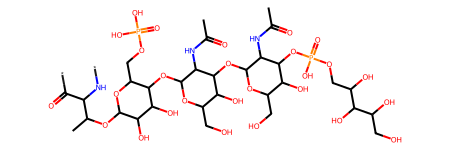

In [22]:
(n4 := Chem.MolFromSmiles(
    '*NC(C(*)=O)C(C)OC1OC(COP(=O)(O)O)C(OC2OC(CO)C(O)C(OC3OC(CO)C(O)C(OP(=O)(O)OCC(O)C(O)C(O)CO)C3NC(C)=O)C2NC(C)=O)C(O)C1O'
))

In [23]:
c124 = Chem.MolFromSmarts('[!$([#6]!@[#6]!@[#6]!@[#6]!@[#6]);#6;!$([#6]~[!#1&!#6]);!$([#6]@[#6])]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]')

In [24]:
def visualize_matches(mol: Chem.Mol, matches: tuple[tuple[int]], *, size: tuple[int, int]=(1000, 500), kekulize: bool =True, **kwargs):
    mol = mol.__copy__()
    for match_idx, match in enumerate(matches, start=1):
        for match_atom_idx, mol_atom_idx in enumerate(match, start=1):
            mol.GetAtomWithIdx(mol_atom_idx).SetProp('atomNote', f'{match_idx}:{match_atom_idx}')
    # mol = Chem.AddHs(mol)
    return Draw.MolToImage(mol, size=size, kekulize=kekulize, **kwargs)

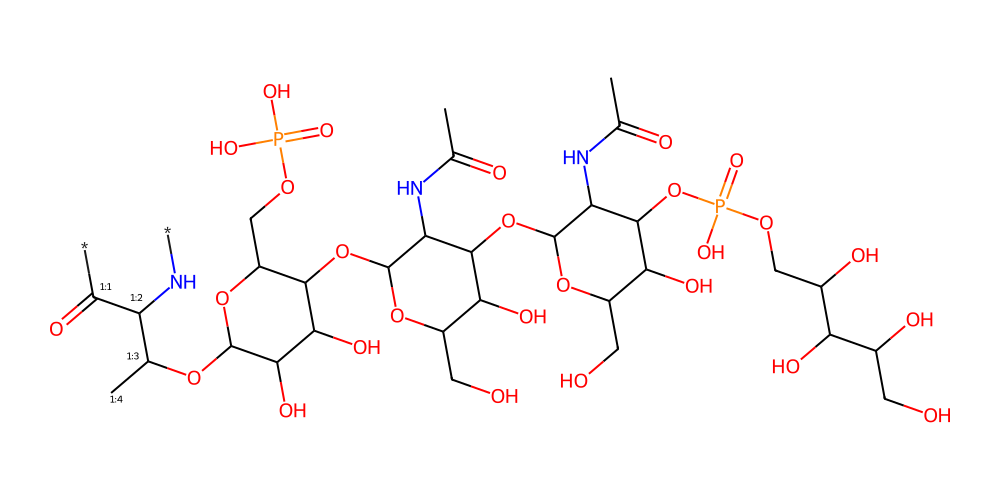

In [25]:
visualize_matches(n4, n4.GetSubstructMatches(ActivationSmarts.C4_FG123.as_mol()))

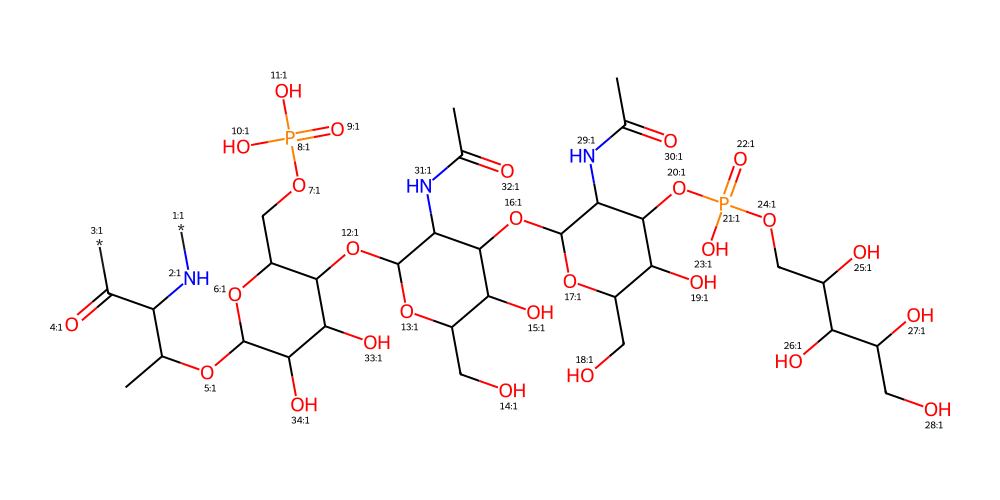

In [26]:
visualize_matches(
    n4,
    # matches=n4.GetSubstructMatches(Chem.MolFromSmarts('[!#6;$([!#6]~[#6]~[#6])]')),
    matches=n4.GetSubstructMatches(Chem.MolFromSmarts('[!#6;$([!$([!#6]-[#6]-[#6]),!$([!#6]=[#6]=[#6])])]')),
)

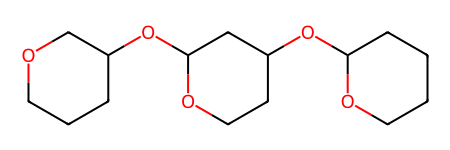

In [27]:
Chem.MurckoDecompose(n4)

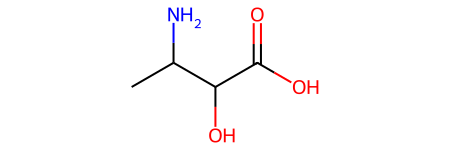

In [28]:
(p3 := Chem.MolFromSmiles('CC(N)C(O)C(O)=O'))

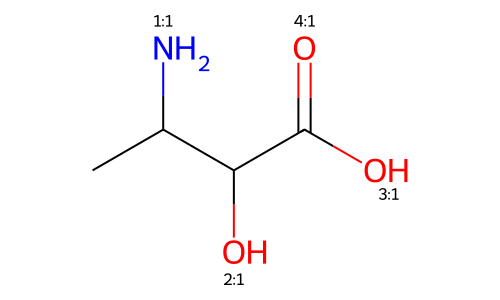

In [29]:
visualize_matches(
    mol=p3,
    # matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[#6;!R;$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]')),
    # matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[!#6;!$(*~[#6]~[#6])]')),
    matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[!#6;!$([!#6]-[#6]-[#6]),!$([!#6]=[#6]=[#6])]')),
    size=(500,300)
)

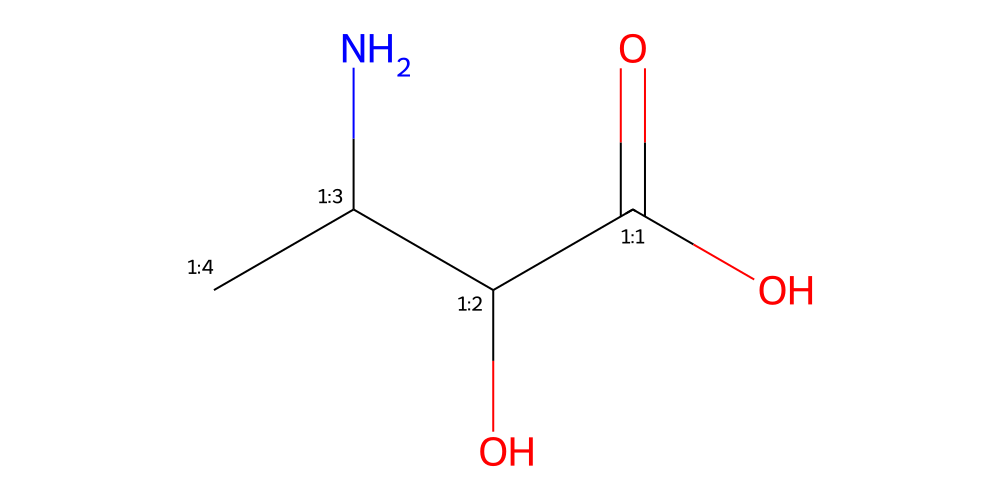

In [30]:
visualize_matches(
    mol=p3,
    matches=p3.GetSubstructMatches(ActivationSmarts.C4_FG123.as_mol()),
)

In [31]:
from rdkit import Chem
from rdkit.Chem import rdMMPA
from rdkit.Chem import Draw

def fragment_molecule(mol):
    """
    Fragment a molecule using RDKit's Murcko scaffolding and molecular fragmentation.
    
    :param smiles: SMILES string of the molecule
    :return: List of fragment SMILES
    """
    # Perform Murcko Decomposition to find the core scaffold
    core = Chem.MurckoDecompose(mol)
    core_smiles = Chem.MolToSmiles(core)
    print(f'Core Scaffold: {core_smiles}')
    
    # Perform MMPA (Matched Molecular Pair Analysis) fragmentation
    frags = rdMMPA.FragmentMol(mol)
    # return Draw.MolsToGridImage(frags, molsPerRow=4, subImgSize=(200, 200))

# Example usage
# Convert the provided image to SMILES using an online tool or manually
# Placeholder SMILES for demonstration purposes
fragment_molecule(n4)

Core Scaffold: C1CCC(OC2CCOC(OC3CCCOC3)C2)OC1


## BRICS Decomposition

https://www.blopig.com/blog/2023/03/brics-decomposition-and-synthetic-accessibility/

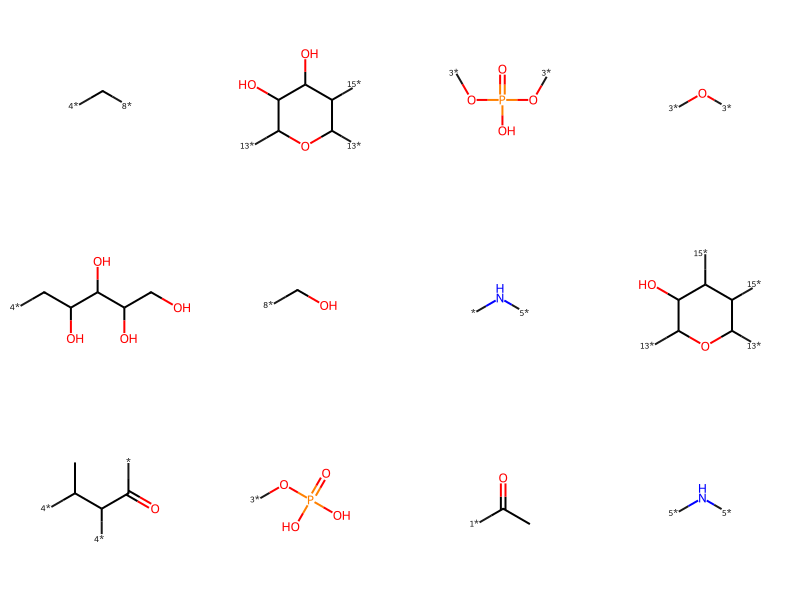

In [32]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in BRICS.BRICSDecompose(n4)], molsPerRow=4, subImgSize=(200,200))

In [33]:
x = visualize_matches(
    mol=p3,
    # matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[#6;!R;$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]')),
    # matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[!#6;!$(*~[#6]~[#6])]')),
    matches=p3.GetSubstructMatches(Chem.MolFromSmarts('[!#6;!$([!#6]-[#6]-[#6]),!$([!#6]=[#6]=[#6])]')),
    size=(300, 100),
    format='svg',
)

In [34]:
(df := pd.DataFrame(data={'smile': ['foo', 'bar'], 'mol_obj': [n4, p2]}))

,smile,mol_obj
0,foo,<rdkit.Chem.rdchem.Mol object at 0x15e971000>
1,bar,<rdkit.Chem.rdchem.Mol object at 0x15e913d10>


In [35]:
from IPython.core.display import HTML

from PIL import Image
import base64
from io import BytesIO

def img_base64(img: Image.Image, format: str | None = None) -> bytes:
    with BytesIO() as buffer:
        img.save(buffer, format=format or img.format)
        return base64.b64encode(buffer.getvalue())
    
def img_formatter(img: Image.Image, format='png'):
    img_base64_str = img_base64(img, format=format).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_base64_str}">'

In [36]:
def mol_to_svg(mol: Chem.Mol, size: tuple[int, int] = (300,100)) -> str:
    width, height = size
    mol = Draw.rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(width, height)
    drawer.DrawMolecule(mol)
    return drawer
    return drawer.GetDrawingText()

In [37]:
HTML(df.to_html(formatters={'mol_obj': mol_to_svg}, escape=False))

,smile,mol_obj
0,foo,
1,bar,


In [38]:
mol_to_svg(n4)